In [1]:
import python_utils as utils
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import neurodsp
import re
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
#messo n_parseg = 150 e sembra avere senso lo spettrogramma anche se non sono 100 come nell'articolo
parseg = 250
neglect_t = 3000

# FLAT. media per ogni valore di dd

In [3]:
Dd_values = [round(0.85 + i * 0.005, 3) for i in range(21)] #max 21

In [4]:
function = "flat"
Dd = ["{:.3f}".format(elemento) for elemento in Dd_values]
subnets = "STN"
simulations = [str(i) for i in range(32)]
sigm_par = float('inf')

pow_t_mean_point = []
pow_error_point = []

#fig,ax = plt.subplots(1,1)
for ddd in Dd:
    #funzione Dd
    print(ddd)
    data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + ddd + "_1.00_1.00_1.6/" + simulations[0] + "/ext_rateD2.txt").T
    data[0] = data[0]/1000
    data[1] = data[1]/1.083

    periodogram_paths = []
    s = []
    for simulation in simulations:
        periodogram_path = './periodograms/' + ddd.replace('.','_') + '_' + subnets + '_' + function + '_' + simulation
        if not os.path.exists(periodogram_path):  #check if periodogram folder exists and if not create one
            os.makedirs(periodogram_path) 
        periodogram_paths.append(periodogram_path)
        ss = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + ddd + "_1.00_1.00_1.6/" + simulation , 'new_sim_parallel.yaml', neglect_t, np.max(data[0]))
        s.append(ss)

    all_pow_t = []
    t = []
    f = []
    for index,ss in enumerate(s):
        output=ss.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_paths[index] + "/periodogram.png")

        f = output[0]
        t = output[1]
        Sxx = output[2]

        mask = (8 <= f) & (f <= 26)
        Sxx_lim = Sxx[mask,:]
        f_lim = f[mask]

        pow_t = []
        for i in range(len(t)):
            pow_t.append( np.mean(Sxx_lim[:, i]) )

        all_pow_t.append(pow_t)

        pow_t = np.array(pow_t)

    ###################################################################################################################

    pow_t_mean = np.mean(all_pow_t)

    pow_error = np.std(np.vstack(all_pow_t), axis=0)/np.sqrt(len(simulations))
    pow_error = np.mean(pow_error)

    pow_t_mean_point.append(pow_t_mean)
    pow_error_point.append(pow_error)

print(pow_t_mean_point)
print(pow_error_point)

0.850
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
0.855
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	no

In [29]:
Dd_values = [0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.9, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95]
t_d = [6.0000, 5.7937, 5.5893, 5.3868, 5.1859, 4.9865, 4.7884, 4.5916, 4.3959, 4.2011, 4.0071, 3.8139, 3.6214, 3.4304, 3.2419, 3.0567, 2.8768, 2.7041, 2.5395, 2.3840, 2.2324]
pow_t_mean_point = [0.019914247149334242, 0.020690578678315804, 0.02158271146066814, 0.022364914133701584, 0.023428835457957573, 0.025125497868107482, 0.026346934723841548, 0.028828969225659612, 0.03220798123872726, 0.035254298671665026, 0.03867622848014253, 0.04674626548972391, 0.05068805695941251, 0.06606716969376104, 0.08487862320152097, 0.09270422348347553, 0.1322581180913206, 0.15084846176010766, 0.18747180115646506, 0.22419232383889678, 0.2697145569231209]
pow_error_point = [0.0019838232642017555, 0.001999857551482696, 0.0021708086191144817, 0.0022749744417916227, 0.002441049902399858, 0.002640832617992426, 0.0027738692999452765, 0.0031292618798778368, 0.0036480613158226044, 0.0040683093611075605, 0.00451842724610424, 0.005668445395626774, 0.006082506534680942, 0.007877499532094852, 0.009638645329156629, 0.010410256249777311, 0.012819346780713003, 0.01291999850097032, 0.014568471805002196, 0.015395217530866883, 0.015333769105628054]

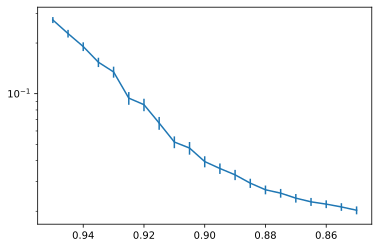

In [27]:
%matplotlib inline
plt.errorbar(Dd_values,pow_t_mean_point,pow_error_point)
plt.yscale('log')
plt.gca().invert_xaxis()
plt.show()

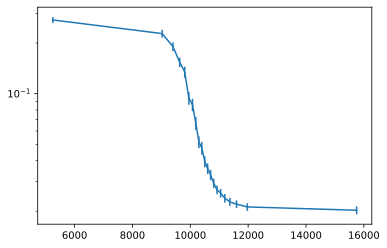

In [28]:
plt.errorbar(t_d,pow_t_mean_point,pow_error_point)
plt.yscale('log')
plt.show()

# SIGMOID0_002 t_mid = 13000

In [1]:
parseg = 250
neglect_t = 3000
t_mid = 13000 - neglect_t  # + parseg/2 questa parte no perche comunque il centro dell'intervallo considerato ha come valore della dd lo stesso a quel tempo
sigm_par = 0.002

# SIGMOID0_0005 t_mid = 20000

In [1]:
parseg = 1000
neglect_t = 3000
t_mid = 20000 - neglect_t  # + parseg/2 questa parte no perche comunque il centro dell'intervallo considerato ha come valore della dd lo stesso a quel tempo
sigm_par = 0.0005

# SIGMOID0_00005 t_mid = 90000 

In [40]:
parseg = 1000
neglect_t = 3000
t_mid = 90000 - neglect_t
sigm_par = 0.00005

# REVERSESIGMOID0_002 t_mid = 13000

In [1]:
parseg = 250
neglect_t = 3000
t_mid = 13000 - neglect_t  # + parseg/2 questa parte no perche comunque il centro dell'intervallo considerato ha come valore della dd lo stesso a quel tempo
sigm_par = 0.002

In [2]:
import python_utils as utils
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import neurodsp
import re
from ipywidgets import interact
%config InlineBackend.figure_format = 'svg'

In [3]:
#valore threshold trovato sopra trascritto in modo da evitare calcoli
alpha = 0.2573329144325134
alpha_mean = 0.16799556857190273

In [4]:
#parseg 1000 overlap 900
Dd_values = [0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.9, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95]
pow_t_mean_point = [0.020259666276066162, 0.02120296579584084, 0.022038656032935276, 0.022739171696594434, 0.023911219984606994, 0.02560984095825443, 0.026820006580383835, 0.02936480560275397, 0.03290743744029855, 0.0358926143305719, 0.039456441500428624, 0.047487448465174824, 0.05157039384399911, 0.0668747156927251, 0.0860039921968109, 0.09407035467203172, 0.13466064380339335, 0.15378850667710425, 0.1906813562651049, 0.22771976231034616, 0.27424117184178015]
pow_error_point = [0.0010919805458215308, 0.0011045140478354687, 0.0011731107221504078, 0.0012456485492271495, 0.0014015211550117259, 0.0015321354185727782, 0.001618665953826488, 0.0018472893515984281, 0.0023121285129270035, 0.0025637193598613394, 0.002985728231559733, 0.004092574241969529, 0.004157183438075225, 0.005882737242513239, 0.007321135855135147, 0.00818115786461861, 0.010111961332743833, 0.009829409436759418, 0.011374932858558683, 0.011971323646825854, 0.011339414807793977]

In [5]:
#parseg 250 0verlap 125
Dd_values = [0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.9, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95]
pow_t_mean_point = [0.019914247149334242, 0.020690578678315804, 0.02158271146066814, 0.022364914133701584, 0.023428835457957573, 0.025125497868107482, 0.026346934723841548, 0.028828969225659612, 0.03220798123872726, 0.035254298671665026, 0.03867622848014253, 0.04674626548972391, 0.05068805695941251, 0.06606716969376104, 0.08487862320152097, 0.09270422348347553, 0.1322581180913206, 0.15084846176010766, 0.18747180115646506, 0.22419232383889678, 0.2697145569231209]
pow_error_point = [0.0019838232642017555, 0.001999857551482696, 0.0021708086191144817, 0.0022749744417916227, 0.002441049902399858, 0.002640832617992426, 0.0027738692999452765, 0.0031292618798778368, 0.0036480613158226044, 0.0040683093611075605, 0.00451842724610424, 0.005668445395626774, 0.006082506534680942, 0.007877499532094852, 0.009638645329156629, 0.010410256249777311, 0.012819346780713003, 0.01291999850097032, 0.014568471805002196, 0.015395217530866883, 0.015333769105628054]

In [6]:
#qui inserisci dati diversi per scegliere simulazione REVERSESIGMOID
t_d = []

t_d.append(t_mid*0.7)
for x in Dd_values[1:-1]:
    y = -np.log((0.1) /(x - 0.85) - 1)/sigm_par + t_mid
    t_d.append(y)
    
t_d.append(t_mid*1.3)

t_d = np.array(t_d)

In [45]:
#qui inserisci dati diversi per scegliere simulazione
t_d = []

t_d.append(t_mid*0.7)
for x in Dd_values[1:-1]:
    y = -np.log((-0.1) /(x - 0.95) - 1)/sigm_par + t_mid
    t_d.append(y)
    
t_d.append(t_mid*1.3)

t_d = np.array(t_d)

In [7]:
%matplotlib inline
function = "reversesigmoid" + str(format(sigm_par, 'f')).replace('.', '_')
while function.endswith('0'):
    function = function[:-1]
Dd = "0.950"
subnets = "STN"
simulations = [str(i) for i in range(32)]
sigm_par = sigm_par

new_Dd = Dd.replace('.','_')
#new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione

#funzione Dd
data = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/" + simulations[0] + "/ext_rateD2.txt").T

data[0] = data[0]/1000
data[1] = data[1]/1.083

#check if periodogram folder exists and if not create one
#spikesim
periodogram_paths = []
s = []
for simulation in simulations:
    periodogram_path = './periodograms/' + Dd.replace('.','_') + '_' + subnets + '_' + function + '_' + simulation
    if not os.path.exists(periodogram_path):  #check if periodogram folder exists and if not create one
        os.makedirs(periodogram_path) 
    periodogram_paths.append(periodogram_path)
    ss = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/" + simulation , 'new_sim_parallel.yaml', neglect_t, np.max(data[0]))
    s.append(ss)

all_pow_t = []
t = []
f = []

for index,ss in enumerate(s):
    output=ss.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_paths[index] + "/periodogram.png")

    f = output[0]
    t = output[1]
    Sxx = output[2]

    mask = (8 <= f) & (f <= 26)
    Sxx_lim = Sxx[mask,:]
    f_lim = f[mask]

    pow_t = []
    for i in range (len(t)):
        pow_t.append(np.mean(Sxx_lim[:,i]))

    all_pow_t.append(pow_t)


np.vstack(all_pow_t)
pow_t_mean = np.mean(all_pow_t, axis=0)
pow_error = np.std(all_pow_t, axis=0)/np.sqrt(len(simulations))

nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125
nparseg = 250	noverlap=125


## time-pow_t

In [39]:
%matplotlib widget
# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t_mean, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots(figsize = (9,5))

pow_t_mean = np.array(pow_t_mean)

# Utilizza la funzione errorbar per tracciare i dati con errori associati
ax1.errorbar(t, pow_t_mean, yerr=pow_error, fmt='none', capsize=1, color='black', ecolor='black', elinewidth=1)


# Plot dei dati originali

ax1.plot(t[pow_t_mean >= alpha_mean], pow_t_mean[pow_t_mean >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t_mean, label='Intensità media', color='lightblue')
ax1.set_yscale('log')

# Aggiungi la moving average al grafico di ax1
#ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

# Aggiungi il terzo set di dati con errori associati al grafico esistente
ax1.errorbar(t_d/1000, pow_t_mean_point, yerr=pow_error_point, fmt='o', label='simulazioni a Dd costante', color='green')

# Imposta altre personalizzazioni per il tuo grafico, se necessario
plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()  # Assicurati di avere tutte le etichette delle leggende necessarie

#ax2 = ax1.twinx()
#ax2.plot(data[0][neglect_t*10:]-data[0][neglect_t*10], data[1][neglect_t*10:], 'r-')
#ax2.set_xlim(data[0][neglect_t*10], data[0][-neglect_t*10 - int(parseg/2*10)])
#ax2.set_ylim(0.83,0.97)
#ax2.set_ylabel('Dopamine depletion', color='r')
#ax2.tick_params(axis='y', labelcolor='red')

plt.title(f'Intensità nel Range \u03B2 per \u03C4 = 0.5 [s] nparseg = 250')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [26]:
#REVERSESIGMOID
def sigmoid(x):
    return 1 / (1 + np.exp(-sigm_par * (x - t_mid))) * (0.95 - 0.85) + 0.85

# Ora puoi utilizzare questa funzione per calcolare il valore di y per un dato valore di x.
x = t*1000  # Sostituisci con il valore di x desiderato
d_t = sigmoid(x)

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-sigm_par * (x - t_mid))) * (0.85 - 0.95) + 0.95

# Ora puoi utilizzare questa funzione per calcolare il valore di y per un dato valore di x.
x = t*1000  # Sostituisci con il valore di x desiderato
d_t = sigmoid(x)

## dd-pow

In [40]:
%matplotlib widget
# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 1  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t_mean, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots(figsize = (9,5))

pow_t_mean = np.array(pow_t_mean)

# Utilizza la funzione errorbar per tracciare i dati con errori associati
ax1.errorbar(d_t, pow_t_mean, yerr=pow_error, fmt='none', capsize=1, color='black', ecolor='black', elinewidth=1)

# Plot dei dati originali
#ax1.plot(d_t[pow_t_mean >= alpha_mean], pow_t_mean[pow_t_mean >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(d_t, pow_t_mean, 'o', label='Intensità media', color='black')
ax1.set_yscale('log')

# Aggiungi la moving average al grafico di ax1
ax1.plot(d_t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

# Aggiungi il terzo set di dati con errori associati al grafico esistente
ax1.errorbar(Dd_values, pow_t_mean_point, yerr=pow_error_point, fmt='o', label='simulazioni a Dd costante', color='green')

# Imposta altre personalizzazioni per il tuo grafico, se necessario
plt.xlabel('Dopamine depletion')
plt.ylabel('intensità media')
plt.legend()  # Assicurati di avere tutte le etichette delle leggende necessarie
plt.title(f'Dd vs Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s] nparseg = {parseg}')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [28]:
# Creazione della maschera per escludere le righe con t < 1 e t > 19
mask = (t >= 1) & (t <= 19)

# Applica la maschera per selezionare solo le righe desiderate
data_to_save = np.column_stack((t[mask], pow_t_mean[mask], d_t[mask], pow_error[mask]))

# Salva i dati in un file di testo
#np.savetxt('./build/output/n1/' + function + '_0.00_0.0000_0.00_' + Dd + '_1.00_1.00_1.6/parseg' + str(parseg) + '.txt', data_to_save, header='t pow_t_mean d_t pow_error', delimiter='\t')


# parseg variation

In [29]:
#parseg 250 0verlap 125
Dd_values = [0.85, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.9, 0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95]
pow_t_mean_point = [0.019914247149334242, 0.020690578678315804, 0.02158271146066814, 0.022364914133701584, 0.023428835457957573, 0.025125497868107482, 0.026346934723841548, 0.028828969225659612, 0.03220798123872726, 0.035254298671665026, 0.03867622848014253, 0.04674626548972391, 0.05068805695941251, 0.06606716969376104, 0.08487862320152097, 0.09270422348347553, 0.1322581180913206, 0.15084846176010766, 0.18747180115646506, 0.22419232383889678, 0.2697145569231209]
pow_error_point = [0.0019838232642017555, 0.001999857551482696, 0.0021708086191144817, 0.0022749744417916227, 0.002441049902399858, 0.002640832617992426, 0.0027738692999452765, 0.0031292618798778368, 0.0036480613158226044, 0.0040683093611075605, 0.00451842724610424, 0.005668445395626774, 0.006082506534680942, 0.007877499532094852, 0.009638645329156629, 0.010410256249777311, 0.012819346780713003, 0.01291999850097032, 0.014568471805002196, 0.015395217530866883, 0.015333769105628054]

In [30]:
# Carica i dati dai file
file_paths = [
    './build/output/n1/' + function + '_0.00_0.0000_0.00_' + Dd + '_1.00_1.00_1.6/parseg250.txt',
    './build/output/n1/' + function + '_0.00_0.0000_0.00_' + Dd + '_1.00_1.00_1.6/parseg500.txt',
    './build/output/n1/' + function + '_0.00_0.0000_0.00_' + Dd + '_1.00_1.00_1.6/parseg1000.txt',
    './build/output/n1/' + function + '_0.00_0.0000_0.00_' + Dd + '_1.00_1.00_1.6/parseg2000.txt',
]

data_list = []  # Una lista per memorizzare i dati da ciascun file

for file_path in file_paths:
    data = np.loadtxt(file_path, delimiter='\t', skiprows=1)  # Salta la riga dell'intestazione
    data_list.append(data)

# Estrai le colonne necessarie
t_list = [data[:, 0] for data in data_list]
pow_t_mean_list = [data[:, 1] for data in data_list]
d_t_list = [data[:, 2] for data in data_list]
pow_error_list = [data[:, 3] for data in data_list]

# Fai il plot dei dati con intensità su scala logaritmica
plt.figure(figsize=(10, 6))

for i in range(len(file_paths)):
    parseg_values = [int(file_path.split('parseg')[1].split('.txt')[0]) for file_path in file_paths]
    plt.errorbar(d_t_list[i], pow_t_mean_list[i], yerr=pow_error_list[i], label=f'parseg {parseg_values[i]}', capsize=5)


plt.xlabel('Dopamine depletion')
plt.ylabel('intensità media')
plt.yscale('log')
plt.title('Dd vs intensity changing parseg')
plt.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [31]:
# Fai il plot dei dati con intensità su scala logaritmica
plt.figure(figsize=(10, 6))

for i in range(len(file_paths)):
    parseg_values = [int(file_path.split('parseg')[1].split('.txt')[0]) for file_path in file_paths]
    plt.errorbar(t_list[i], pow_t_mean_list[i], yerr=pow_error_list[i], label=f'parseg {parseg_values[i]}', capsize=5)

plt.xlabel('tempo (s)')
plt.ylabel('intensità media')
plt.yscale('log')
plt.title('time vs intensity changing parseg')
plt.legend()
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [32]:
from scipy.optimize import curve_fit

def linear_fit(parseg, m, q):
    return m * np.array(parseg) + q

# Indice del tempo desiderato
time_index = 80

# Seleziona i valori di intensità al tempo specificato per ciascun parseg
intensity_values = [pow_t_mean_list[i][time_index] for i in range(len(file_paths))]
error_values = [pow_error_list[i][time_index] for i in range(len(file_paths))]

# Fai il fit della retta usando il metodo dei minimi quadrati
params, covariance = curve_fit(linear_fit, parseg_values, intensity_values, sigma=error_values, absolute_sigma=True)

# Estrai i parametri del fit e le relative incertezze
m_fit, q_fit = params
dm, dq = np.sqrt(np.diag(covariance))

# Calcola l'errore totale sulla retta interpolata a parseg=0
error = np.sqrt((m_fit * dm)**2 + dq**2)

# Calcola i valori del fit lineare
fit_values = m_fit * np.array(parseg_values) + q_fit

# Calcola il valore interpolato per parseg = 0 utilizzando l'intercetta del fit lineare
interpolated_value_at_parseg_0 = q_fit
# Calcola l'errore totale sulla retta interpolata a parseg=0
error = np.sqrt((m_fit * dm)**2 + dq**2)

# Aggiungi un punto a parseg=0
parseg_values_extended = np.insert(parseg_values, 0, 0)
fit_values_extended = np.insert(fit_values, 0, q_fit)

# Fai il plot dei dati, della retta di fit e del valore interpolato per parseg = 0
plt.figure(figsize=(8, 5))
plt.errorbar(parseg_values, intensity_values, yerr=error_values, fmt='o', capsize=5, label='intensità variando parseg')
plt.plot(parseg_values_extended, fit_values_extended, '-', label='Fit lineare')
plt.errorbar([0], [interpolated_value_at_parseg_0], color='red', yerr=error, fmt='o', capsize=5, label='parseg = 0')
plt.xlabel('parseg')
plt.ylabel('Intensità media')
plt.title(f'Fit lineare ai dati al tempo {t_list[0][time_index]:.2f} s')
plt.legend()
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# parseg 0

In [33]:
from scipy.optimize import curve_fit

def linear_fit(parseg, m, q):
    return m * np.array(parseg) + q

# Creazione di una lista per memorizzare i valori estrapolati per parseg=0 per ogni valore di t
values_at_parseg_0 = []
errors_at_parseg_0 = []

# Itera su tutti i valori di t
for specific_t_value in t_list[0]:
    specific_t_index = np.argmin(np.abs(t_list[0] - specific_t_value))

    intensity_at_specific_t = [pow_t_mean_list[i][specific_t_index] for i in range(len(file_paths))]
    error_at_specific_t = [pow_error_list[i][specific_t_index] for i in range(len(file_paths))]

    # Estrai i valori di parseg
    parseg_values = [int(file_path.split('parseg')[1].split('.txt')[0]) for file_path in file_paths]
    parseg_values = np.array(parseg_values, dtype=float)

    # Ordina i dati in base ai valori di parseg
    sorted_data = sorted(zip(parseg_values, intensity_at_specific_t, error_at_specific_t))
    parseg_values, intensity_at_specific_t, error_at_specific_t = zip(*sorted_data)

    # Fai il fit della retta usando il metodo dei minimi quadrati
    params, covariance = curve_fit(linear_fit, parseg_values, intensity_at_specific_t, sigma=error_at_specific_t, absolute_sigma=True)

    # Estrai i parametri del fit e le relative incertezze
    m_fit, q_fit = params
    dm, dq = np.sqrt(np.diag(covariance))

    # Calcola l'errore totale sulla retta interpolata a parseg=0
    errors = np.sqrt((m_fit * dm)**2 + dq**2)

    # Aggiungi il valore interpolato e l'errore alle rispettive liste
    values_at_parseg_0.append(linear_fit(0, m_fit, q_fit))
    errors_at_parseg_0.append(errors)

# Plot dei valori interpolati a parseg=0 nel tempo con errori
plt.figure(figsize=(10, 6))
plt.errorbar(t_list[0], values_at_parseg_0, yerr=errors_at_parseg_0, marker='o', linestyle='-', color='green', label='Interpolati a parseg=0')
plt.xlabel('Tempo (t)')
plt.ylabel('Valori interpolati a parseg=0')
plt.title('Plot di Valori interpolati a parseg=0 nel tempo con errori (retta)')
plt.legend()
plt.grid(True)
plt.show()

# Salva i dati in un file di testo
#data_to_save = np.column_stack((t_list[0], values_at_parseg_0, d_t_list[0], errors_at_parseg_0))
#np.savetxt('./build/output/n1/' + function + '_0.00_0.0000_0.00_' + Dd + '_1.00_1.00_1.6/parseg0.txt', data_to_save, header='t pow_t_mean d_t pow_error', delimiter='\t')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [42]:
# Carica i dati dai file
file_paths = [
    './build/output/n1/' + function + '_0.00_0.0000_0.00_' + Dd + '_1.00_1.00_1.6/parseg0.txt',
    './build/output/n1/' + function + '_0.00_0.0000_0.00_' + Dd + '_1.00_1.00_1.6/parseg250.txt',
    './build/output/n1/' + function + '_0.00_0.0000_0.00_' + Dd + '_1.00_1.00_1.6/parseg500.txt',
    './build/output/n1/' + function + '_0.00_0.0000_0.00_' + Dd + '_1.00_1.00_1.6/parseg1000.txt',
    './build/output/n1/' + function + '_0.00_0.0000_0.00_' + Dd + '_1.00_1.00_1.6/parseg2000.txt',
]

data_list = []  # Una lista per memorizzare i dati da ciascun file

# Estrai i valori di parseg una sola volta fuori dal loop
parseg_values = [int(file_path.split('parseg')[1].split('.txt')[0]) for file_path in file_paths]

for file_path, parseg_value in zip(file_paths, parseg_values):
    data = np.loadtxt(file_path, delimiter='\t', skiprows=1)  # Salta la riga dell'intestazione
    data_list.append(data)

# Estrai le colonne necessarie
t_list = [data[:, 0] for data in data_list]
pow_t_mean_list = [data[:, 1] for data in data_list]
d_t_list = [data[:, 2] for data in data_list]
pow_error_list = [data[:, 3] for data in data_list]

# Fai il plot dei dati con intensità su scala logaritmica
plt.figure(figsize=(10, 6))

for i in range(len(file_paths)):
    # Usa il colore nero solo quando parseg è uguale a 0
    if parseg_values[i] == 0:
        plt.errorbar(d_t_list[i], pow_t_mean_list[i], yerr=pow_error_list[i], label=f'parseg {parseg_values[i]}', capsize=5, color='black')
    else:
        plt.errorbar(d_t_list[i], pow_t_mean_list[i], yerr=pow_error_list[i], label=f'parseg {parseg_values[i]}', capsize=5)

plt.xlabel('Dopamine depletion')
plt.ylabel('intensità media')
plt.yscale('log')
plt.title('Dd vs intensity changing parseg')
plt.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [41]:
# Fai il plot dei dati con intensità su scala logaritmica
plt.figure(figsize=(10, 6))

for i in range(len(file_paths)):
    parseg_values = [int(file_path.split('parseg')[1].split('.txt')[0]) for file_path in file_paths]

    # Usa il colore nero solo quando parseg è uguale a 0
    if parseg_values[i] == 0:
        plt.errorbar(t_list[i], pow_t_mean_list[i], yerr=pow_error_list[i], label=f'parseg {parseg_values[i]}', capsize=5, color='black')
    else:
        plt.errorbar(t_list[i], pow_t_mean_list[i], yerr=pow_error_list[i], label=f'parseg {parseg_values[i]}', capsize=5)

plt.xlabel('tempo (s)')
plt.ylabel('intensità media')
plt.yscale('log')
plt.title('time vs intensity changing parseg')
plt.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [36]:
%matplotlib widget

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 1  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t_mean, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots(figsize=(9, 5))

pow_t_mean = np.array(pow_t_mean)

# Utilizza la funzione errorbar per tracciare i dati con errori associati
ax1.errorbar(t, pow_t_mean, yerr=pow_error, fmt='none', capsize=1, color='black', ecolor='black', elinewidth=1)

# Plot dei dati originali
ax1.plot(t[pow_t_mean >= alpha_mean], pow_t_mean[pow_t_mean >= alpha_mean], '+r', label='Dati sopra \u03B1')
ax1.plot(t, pow_t_mean, label='Intensità media', color='lightblue')
ax1.set_yscale('log')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

# Aggiungi il terzo set di dati con errori associati al grafico esistente
ax1.errorbar(t_d/1000, pow_t_mean_point, yerr=pow_error_point, fmt='o', label='simulazioni a Dd costante', color='green')

# Imposta altre personalizzazioni per il tuo grafico, se necessario
plt.xlabel('Tempo [s]')
plt.ylabel('Intensità media')
plt.legend()  # Assicurati di avere tutte le etichette delle leggende necessarie

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s] nparseg = {parseg}')
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# confronto dd costante e dinamica

In [44]:
%matplotlib widget

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots(figsize=(9, 5))

pow_t_mean = np.array(pow_t_mean)

ax1.set_yscale('log')

# Aggiungi il terzo set di dati con errori associati al grafico esistente
ax1.errorbar(t_list[0], pow_t_mean_list[0], yerr=pow_error_list[0], label=f'parseg {parseg_values[0]}', capsize=5, color='black')
ax1.errorbar(t_d/1000, pow_t_mean_point, yerr=pow_error_point, fmt='o', label='simulazioni a Dd costante', color='green')
# Imposta altre personalizzazioni per il tuo grafico, se necessario
plt.xlabel('Tempo [s]')
plt.ylabel('Intensità media')
plt.legend()  # Assicurati di avere tutte le etichette delle leggende necessarie

plt.title(f'Time Series della Media dell\'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [43]:
%matplotlib widget
# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 1  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t_mean, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots(figsize = (9,5))

pow_t_mean = np.array(pow_t_mean)

ax1.set_yscale('log')

# Aggiungi il terzo set di dati con errori associati al grafico esistente
ax1.errorbar(d_t_list[0], pow_t_mean_list[0], yerr=pow_error_list[0], label=f'parseg {parseg_values[0]}', capsize=5, color='black')
ax1.errorbar(Dd_values, pow_t_mean_point, yerr=pow_error_point, fmt='o', label='simulazioni a Dd costante', color='green')

# Imposta altre personalizzazioni per il tuo grafico, se necessario
plt.xlabel('Dopamine depletion')
plt.ylabel('intensità media')
plt.legend()  # Assicurati di avere tutte le etichette delle leggende necessarie
plt.title(f'Dd vs Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s]')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …